# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
data = soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create DataFrame from HTML table
df = pd.read_html(StringIO(str(data)))[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.


In [7]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [9]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
months = df.month.value_counts().sort_index()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [11]:
# 2. How many Martian days' worth of data are there?
days = df.sol.nunique()
days

1867

In [12]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

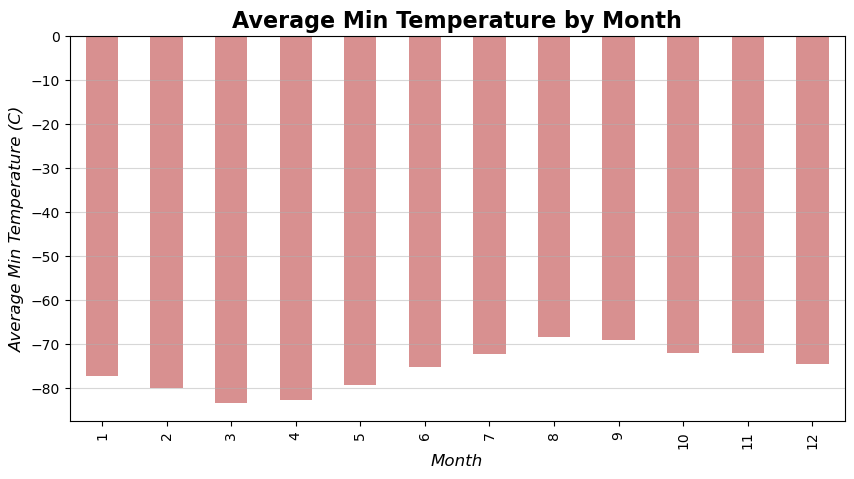

In [13]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar', figsize=(10, 5), color='firebrick', alpha=0.5)

# Add labels and title
plt.xlabel('Month', fontsize=12, fontstyle='italic')
plt.ylabel('Average Min Temperature (C)', fontsize=12, fontstyle='italic')
plt.title('Average Min Temperature by Month', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.5)

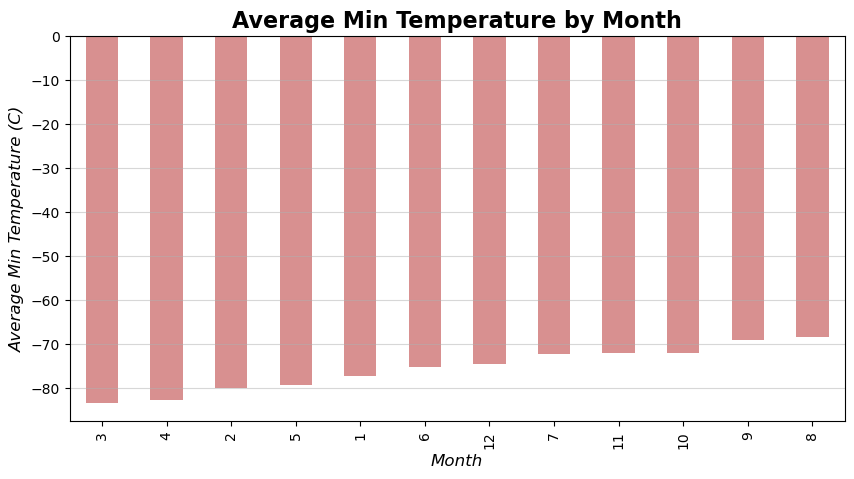

In [14]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp.sort_values(ascending=True).plot(kind='bar', figsize=(10, 5), color='firebrick', alpha=0.5)

# Add labels and title
plt.xlabel('Month', fontsize=12, fontstyle='italic')
plt.ylabel('Average Min Temperature (C)', fontsize=12, fontstyle='italic')
plt.title('Average Min Temperature by Month', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.5)

In [15]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

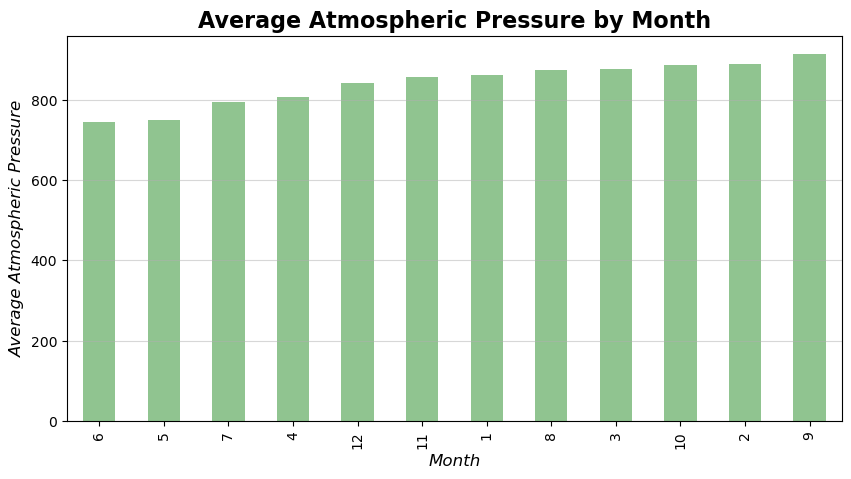

In [16]:
# Plot the average pressure by month
avg_pressure.sort_values(ascending=True).plot(kind='bar', figsize=(10, 5), color='forestgreen', alpha=0.5)

# Add labels and title
plt.xlabel('Month', fontsize=12, fontstyle='italic')
plt.ylabel('Average Atmospheric Pressure', fontsize=12, fontstyle='italic')
plt.title('Average Atmospheric Pressure by Month', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.5)

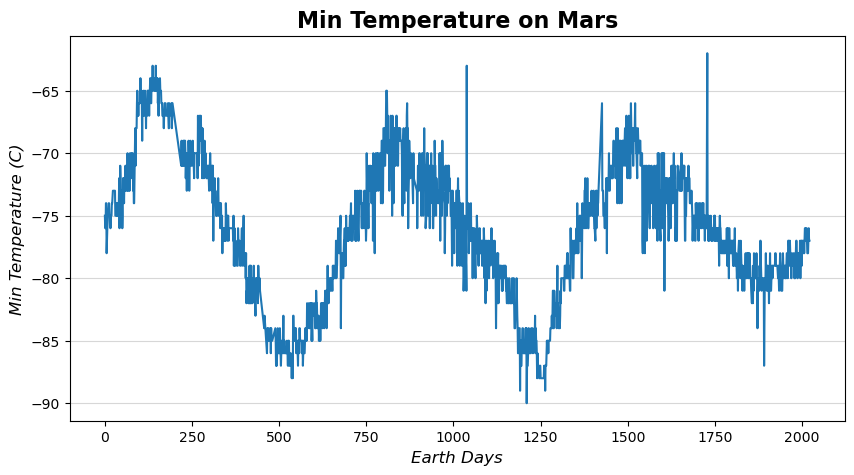

In [17]:
# 5. How many terrestrial (earth) days are there in a Martian year?
elapsed_days = (df.terrestrial_date - df.terrestrial_date.min()).dt.days

plt.figure(figsize=(10, 5))

plt.plot(elapsed_days, df['min_temp'])
plt.xlabel('Earth Days', fontsize=12, fontstyle='italic')
plt.ylabel('Min Temperature (C)', fontsize=12, fontstyle='italic')
plt.title('Min Temperature on Mars', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.5)

In [18]:
# Calculate the number of days in a Martian year
month_3_temps = df.loc[df.month == 3, ['min_temp', 'terrestrial_date']]
peak1 = month_3_temps.loc[df.terrestrial_date.dt.year == 2017].max()
peak2 = month_3_temps.loc[df.terrestrial_date.dt.year == 2016].max()

print((peak1.terrestrial_date - peak2.terrestrial_date).days)

686


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

Based on my calculations using the data, a year on Mars appears to be 686 days. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [19]:
# Write the data to a CSV
with open('output_data/mars_weather.csv', 'w') as f:
    df.to_csv(f, index=False, header=True)

In [20]:
browser.quit()